##### Load modules

In [36]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

##### Load Images to tf data pipeline

In [37]:
try:
    images = tf.data.Dataset.list_files('data\\images\\*.jpg' , shuffle=False)
except:
    print("Empty directory...")

In [38]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [39]:
images = images.map(load_image)

In [40]:
images.as_numpy_iterator().next()

array([[[176, 173, 158],
        [169, 166, 151],
        [176, 168, 157],
        ...,
        [222, 179, 170],
        [222, 179, 170],
        [223, 180, 171]],

       [[163, 157, 145],
        [170, 164, 152],
        [176, 168, 157],
        ...,
        [210, 167, 158],
        [209, 166, 157],
        [209, 166, 157]],

       [[168, 159, 150],
        [168, 158, 149],
        [169, 159, 150],
        ...,
        [204, 160, 149],
        [202, 158, 147],
        [199, 155, 144]],

       ...,

       [[107,  74,  57],
        [107,  74,  57],
        [108,  75,  58],
        ...,
        [ 85,  50,  30],
        [ 83,  50,  31],
        [ 82,  49,  30]],

       [[107,  76,  58],
        [106,  75,  57],
        [108,  76,  61],
        ...,
        [ 85,  50,  28],
        [ 84,  52,  31],
        [ 85,  53,  32]],

       [[105,  74,  56],
        [104,  73,  55],
        [106,  74,  59],
        ...,
        [ 86,  51,  29],
        [ 85,  53,  32],
        [ 87,  55,  34]]

##### View raw images with matplotlib

In [41]:
image_generator = images.batch(4).as_numpy_iterator()

In [42]:
plot_images = image_generator.next()

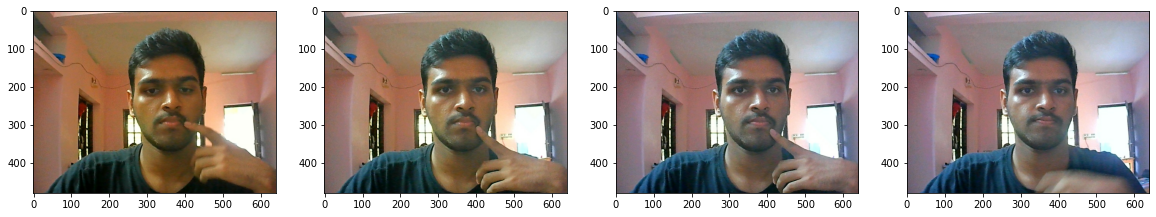

In [43]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

### Split train , test , val

In [44]:
import os
import random
import shutil

# Define the paths of the 'images' folder and the new folder
images_folder_path = 'data\\images'
train_folder_path = 'data\\train\\images'
test_folder_path = 'data\\test\\images'
val_folder_path = 'data\\val\\images'

# Count the total number of images in the 'images' folder
total_images_count = len(os.listdir(images_folder_path))

# Calculate the count of images to move to the new folder
images_test = int(0.125 * total_images_count)
images_val = int(0.125 * total_images_count)


# Get a list of all the images in the 'images' folder
image_names = os.listdir(images_folder_path)

# Shuffle the image names list to get random images
random.shuffle(image_names)

# Move the first 'images_to_move_count' number of images to the new folder
for i in range(images_test):
    image_path = os.path.join(images_folder_path, image_names[i])
    new_image_path = os.path.join(test_folder_path, image_names[i])
    shutil.move(image_path, new_image_path)

# Get a list of all the images in the 'images' folder
image_names = os.listdir(images_folder_path)

# Shuffle the image names list to get random images
random.shuffle(image_names)    

for i in range(images_val):
    image_path = os.path.join(images_folder_path, image_names[i])
    new_image_path = os.path.join(val_folder_path, image_names[i])
    shutil.move(image_path, new_image_path)

# Loop through the files in the source folder
for filename in os.listdir(images_folder_path):
    # Check if the file is an image by checking the file extension
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Construct the source and destination paths for the image file
        source_path = os.path.join(images_folder_path, filename)
        destination_path = os.path.join(train_folder_path, filename)
        # Move the image file to the destination folder
        shutil.move(source_path, destination_path)

In [46]:
for folder in ['train' , 'test' , 'val']:
    for file in os.listdir(os.path.join('data' , folder , 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data' , 'labels' , filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data' , folder , 'labels' , filename)
            os.replace(existing_filepath , new_filepath)